# Lezione di laboratorio 1
Questa lezione e' focalizzata sull'utilizzo di un generatore di numeri pseudo-casuali (esercizio 1.1); la creazione di funzioni per campionare numeri casuali secondo distribuzioni esponenziali o di Cauichy-Lorentz (esercizio 1.2) e una simulazione dell'esperimento di Buffon per il calcolo del valore di $\pi$ (esercizio 1.3)

### ESERCIZIO 1.1 a
Viene utilizzato il generatore di numeri pseudo-casuali uniformi fornito per eseguire il calcolo dell'integrale: <br>
$\langle r \rangle = \int_0^1 r dr = 1/2$ il cui valore è noto. <br>
Sotto è riportato il valore ottenuto con le incertezze statistiche, in funzione del numero di blocchi (un blocco corrisponde a un calcolo del valore campionando 10000 punti casuali):

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
c1,c2,c3 = np.loadtxt("data/output.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(c1, c2, yerr=c3)
plt.hlines(0.5, 0, 100)
plt.xlabel("numero di blocchi (10000 punti ognuno)")
plt.ylabel("<r>")
plt.grid(True)
plt.show()

<Figure size 640x480 with 1 Axes>

### ESERCIZIO 1.1 b
Anche il valore di $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ è noto, e corrisponde alla deviazione standard della media del calcolo di $(r-1/2)^2$. <br>
Di seguito si riporta il grafico dei risultati ottenuti (sempre in funzione del numero di blocchi).

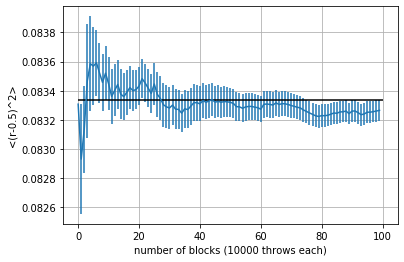

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
c1,c2,c3 = np.loadtxt("data/output2.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(c1, c2, yerr=c3)
plt.hlines(0.083333, 0, 100)
plt.xlabel("number of blocks (10000 throws each)")
plt.ylabel("<(r-0.5)^2>")
plt.grid(True)
plt.show()

### Esercizio 1.1 c
Si è poi eseguito il test del $\chi^2$ per verificare l'uniformità del generatore di numeri pseudo-casuali. <br>
Dividendo l'intervallo [0,1] in 100 sottointervalli, campionando 10000 numeri casuali nell'intervallo, ci si aspetta di osservare in media 100 eventi in ogni sottointervallo. <br> <br>
Essendo $\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$ ci si aspetta di ottenere come valore 100. <br>
Il test è eseguito 100 volte, di seguito sono riportati i valori di $\chi^2$ per ogni test eseguito:

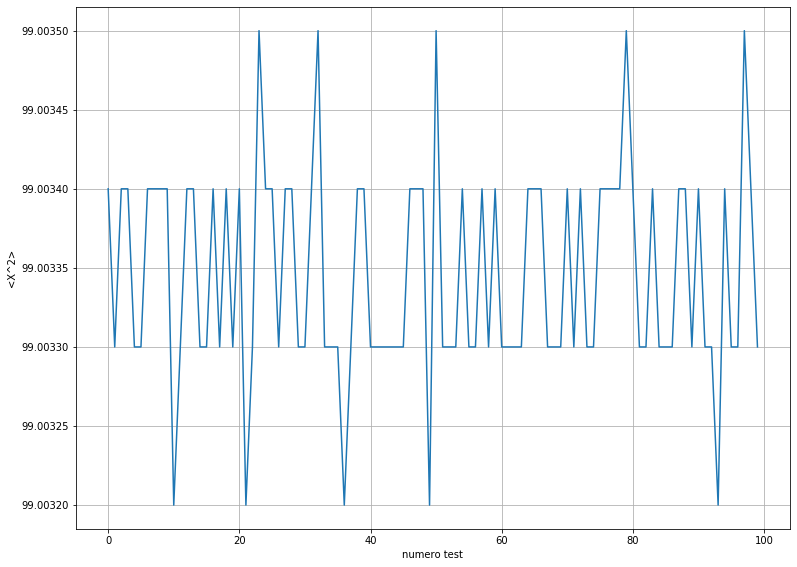

In [3]:
X1,X2 = np.loadtxt("data/outputX.dat", usecols=(0,1), unpack=True)
plt.figure(figsize=(6.4*2,4.8*2))
plt.ticklabel_format(useOffset=False)
plt.plot(X1, X2)
plt.xlabel("numero test")
plt.ylabel("<X^2>")
plt.grid(True)
plt.show()

L'ipotesi che il generatore generi numeri distribuiti uniformemente è accettata ($\chi^2$     <   100).

### ESERCIZIO 1.2a
Sono implementate funzioni per campionare numeri casuali secondo funzioni esponenziali e di Cauchy-Lorentz. <br>
Il metodo di campionamento si basa sull'inversione della funzione cumulativa.
A seguito sono riportati i risultati del campionamento 10000 punti per ciascuna delle nuove distribuzioni introdotte per verificarne il corretto funzionamento <br>
- esponenziale $\lambda=1$ <br>
- Cauchy-Lorentz $\mu=0$ ,  $\Gamma=1$

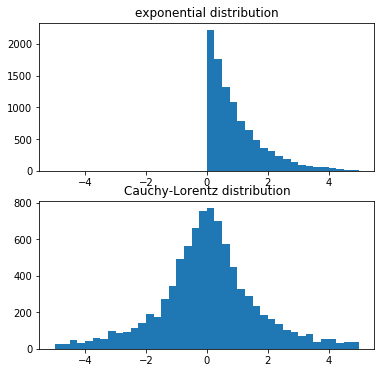

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
c1,c2 = np.loadtxt("data/output3.dat", usecols=(0,1), unpack=True)
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.hist(c1, range=(-5,5), bins=40)
plt.title("exponential distribution")
plt.subplot(2,1,2)
plt.hist(c2, range=(-5,5), bins=40)
plt.title("Cauchy-Lorentz distribution")
plt.show()

## ESERCIZIO 1.2b
Si è poi calcolato $10^4$ volte il valore di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ con N=1,2,10,100 e dove $x_i$ è una variabile casuale campionata con i 3 generatori a disposizione (uniforme, esponenziale, e Cauchy-Lorentz). <br>
A seguito i risutati per il generatore uniforme:

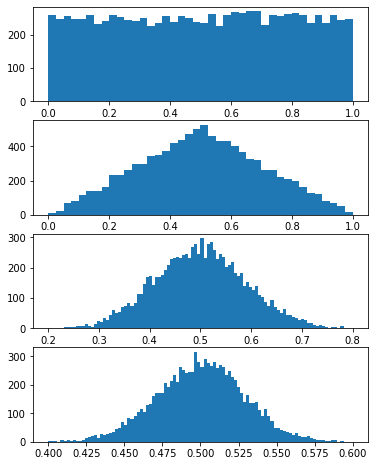

In [5]:
s1, s2, s10, s100, e1, e2, e10, e100, l1, l2, l10, l100 = np.loadtxt("data/histo.dat", 
                                                                     usecols=(0,1,2,3,4,5,6,7,8,9,10,11),unpack=True)
plt.figure(figsize=(6, 8))
plt.subplot(4,1,1)
plt.hist(s1, range=(0,1), bins=40)
plt.subplot(4,1,2)
plt.hist(s2, range=(0,1), bins=40)
plt.subplot(4,1,3)
plt.hist(s10, range=(0.2,0.8), bins=100)
plt.subplot(4,1,4)
plt.hist(s100, range=(0.4, 0.6), bins=100)
plt.show()

Per il generatore esponenziale:

<function matplotlib.pyplot.show(*args, **kw)>

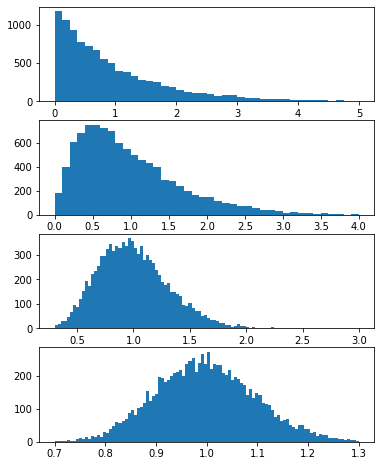

In [6]:
plt.figure(figsize=(6, 8))
plt.subplot(4,1,1)
plt.hist(e1, range=(0,5), bins=40)
plt.subplot(4,1,2)
plt.hist(e2, range=(0,4), bins=40)
plt.subplot(4,1,3)
plt.hist(e10, range=(0.3,3), bins=100)
plt.subplot(4,1,4)
plt.hist(e100, range=(0.7, 1.3), bins=100)
plt.show

Per il generatore Cauchy-Lorentz

<function matplotlib.pyplot.show(*args, **kw)>

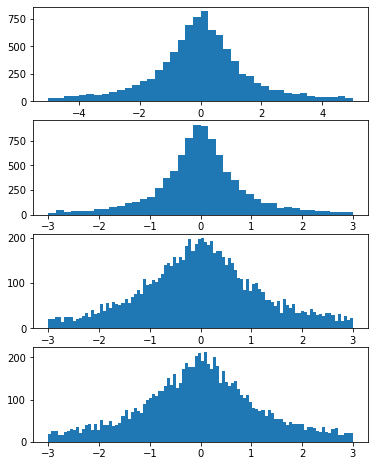

In [7]:
plt.figure(figsize=(6, 8))
plt.subplot(4,1,1)
plt.hist(l1, range=(-5,5), bins=40)
plt.subplot(4,1,2)
plt.hist(l2, range=(-3,3), bins=40)
plt.subplot(4,1,3)
plt.hist(l10, range=(-3,3), bins=100)
plt.subplot(4,1,4)
plt.hist(l100, range=(-3,3), bins=100)
plt.show

### Esercizio 1.3
Viene simulato l'esperimento di Buffon per il calcolo di $\pi$. <br>
Si è cercato di utilizzare funzioni goniometriche o il valore di pi greco stesso all'interno del codice.<br>

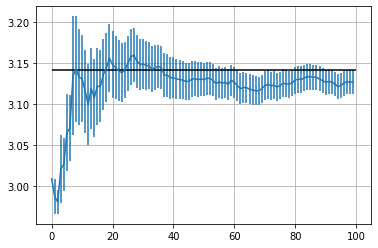

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
bn1, bn2, bn3 = np.loadtxt("data/outputbuff.dat", usecols=(0,1,2), unpack=True)
plt.errorbar(bn1, bn2, yerr=bn3)
plt.hlines(3.14159, 0, 100)
plt.grid(True)
plt.show()